In [1]:
import pandas as pd
import numpy as np
import keras
from keras.applications import VGG19,VGG16
import tensorflow
import seaborn as sns

In [2]:
vgg16=VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [3]:
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [5]:
os.listdir(r"C:\Users\deepa\Downloads\csv files\archive (2)\dataset")

['Beagle',
 'Boxer',
 'Bulldog',
 'Dachshund',
 'German_Shepherd',
 'Golden_Retriever',
 'Labrador_Retriever',
 'Poodle',
 'Rottweiler',
 'Yorkshire_Terrier']

In [7]:
import os
import cv2
import numpy as np

image = []
class_label = []

dataset_path = r"C:\Users\deepa\Downloads\csv files\archive (2)\dataset"

for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    if os.path.isdir(folder_path): 
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            if os.path.isfile(file_path):  
                img = cv2.imread(file_path)  
                resized_img = cv2.resize(img, (224, 224))  
                image.append(resized_img) 
                class_label.append(folder_name)

In [8]:
image[3].shape

(224, 224, 3)

In [9]:
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from keras.layers import Flatten
from keras.models import Model

In [11]:
x=vgg16.output
x=Flatten()(x)
Model=Model(inputs=vgg16.input,outputs=x)

In [12]:
Model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
Model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [14]:
image_array = np.array(image)

# Ensure the array has the correct shape
print("Shape of image array:", image_array.shape)

# Predict using the model
predictions = Model.predict(image_array)

Shape of image array: (967, 224, 224, 3)
31/31 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step


In [15]:
predictions.shape

(967, 25088)

In [17]:
features=pd.DataFrame(predictions)
features

,0,1,2,3,4,5,6,7,8,9,...,25078,25079,25080,25081,25082,25083,25084,25085,25086,25087
0,0.000000,0.0,0.0,0.000000,0.274909,0.0,0.000000,0.000000,0.0,0.0,...,16.057970,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,10.925881,0.0,0.0,0.000000,0.000000,0.0,1.437925,0.000000,0.0,0.0,...,8.420493,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,1.878630,0.0,12.244355,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.234412,0.0,9.582941,0.000000,0.0,0.0,4.881646,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,0.000000,0.0,0.0,54.577339,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
963,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,7.925252,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
964,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,4.452812,0.0,0.0,...,44.962875,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
965,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,39.772461,0.0,0.000000,0.0,3.593513,0.000000,0.0,0.0,0.860170,4.574793


In [18]:
features["label"]=class_label
features

,0,1,2,3,4,5,6,7,8,9,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,label
0,0.000000,0.0,0.0,0.000000,0.274909,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,Beagle
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,Beagle
2,10.925881,0.0,0.0,0.000000,0.000000,0.0,1.437925,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,Beagle
3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,12.244355,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,Beagle
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.234412,0.0,9.582941,0.000000,0.0,0.0,4.881646,0.000000,Beagle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,0.000000,0.0,0.0,54.577339,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,Yorkshire_Terrier
963,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,Yorkshire_Terrier
964,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,4.452812,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,Yorkshire_Terrier
965,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,3.593513,0.000000,0.0,0.0,0.860170,4.574793,Yorkshire_Terrier


In [19]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score,f1_score
import pandas as pd
import time

In [20]:
cv=features["label"]
fv=features.drop("label",axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(fv, cv, test_size=0.2, random_state=10)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((773, 25088), (194, 25088), (773,), (194,))

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define the pipelines without a preprocessor
pipelines_classification = {
    'logistic_regression': Pipeline([
        ('classifier', LogisticRegression())
    ]),
    'sgd_classifier': Pipeline([
        ('classifier', SGDClassifier())
    ]),
    'decision_tree_classifier': Pipeline([
        ('classifier', DecisionTreeClassifier())
    ]),
    'knn_classifier': Pipeline([
        ('classifier', KNeighborsClassifier())
    ]),
    'svc': Pipeline([
        ('classifier', SVC())
    ]),
    'random_forest_classifier': Pipeline([
        ('classifier', RandomForestClassifier())
    ])
}

# Define the parameter grids without referencing the preprocessor
param_grids_classification = {
    'logistic_regression': [
        {
            'classifier__C': [0.1, 1, 10]
        }
    ],
    'sgd_classifier': [
        {
            'classifier__alpha': [0.0001, 0.001, 0.01],
            'classifier__penalty': ['l2', 'l1', 'elasticnet']
        }
    ],
    'decision_tree_classifier': [
        {
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'knn_classifier': [
        {
            'classifier__n_neighbors': [i for i in range(1, 30, 2)],
            'classifier__weights': ['uniform', 'distance']
        }
    ],
    'svc': [
        {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf', 'poly']
        }
    ],
    'random_forest_classifier': [
        {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 5, 10],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4]
        }
    ]
}

best_models_classification = {}

for algorithm in pipelines_classification.keys():    
    grid_search = GridSearchCV(estimator=pipelines_classification[algorithm], 
                               param_grid=param_grids_classification[algorithm], 
                               cv=5, 
                               scoring='f1_micro',  # Correct scoring metric for f1_micro
                               return_train_score=True,
                               verbose=1)
    
    grid_search.fit(X_train, y_train)
    best_models_classification[algorithm] = grid_search.best_estimator_
    
    y_pred_test = grid_search.predict(X_test)
    print('F1 Score on Test Data for', algorithm, ':', f1_score(y_test, y_pred_test, average='micro'))
    
    # Print best parameters
    print("Best Parameters for", algorithm, ":", grid_search.best_params_)
    print("*" * 100)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
F1 Score on Test Data for logistic_regression : 0.979381443298969
Best Parameters for logistic_regression : {'classifier__C': 0.1}
****************************************************************************************************
Fitting 5 folds for each of 9 candidates, totalling 45 fits
F1 Score on Test Data for sgd_classifier : 0.979381443298969
Best Parameters for sgd_classifier : {'classifier__alpha': 0.0001, 'classifier__penalty': 'l2'}
****************************************************************************************************
Fitting 5 folds for each of 3 candidates, totalling 15 fits
F1 Score on Test Data for decision_tree_classifier : 0.9742268041237113
Best Parameters for decision_tree_classifier : {'classifier__max_depth': None}
****************************************************************************************************
Fitting 5 folds for each of 30 candidates, totalling 150 fits
F1 Score on Test

ML MODEL EVALUATION
****************************************************************************************************
logistic_regression
Accuracy Score: 0.979381443298969
Precision Score: 0.9797779540047582
Recall Score: 0.979381443298969
F1 Score: 0.979449910991999


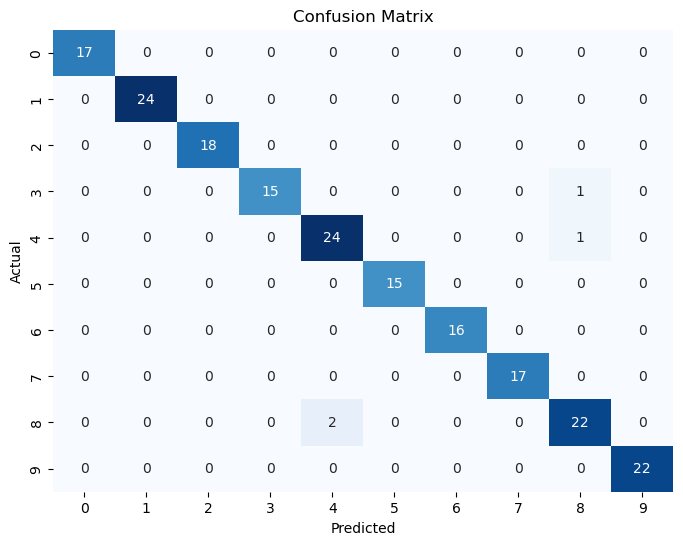

****************************************************************************************************
ML MODEL EVALUATION
****************************************************************************************************
sgd_classifier
Accuracy Score: 0.979381443298969
Precision Score: 0.9804666304937601
Recall Score: 0.979381443298969
F1 Score: 0.9795320744415713


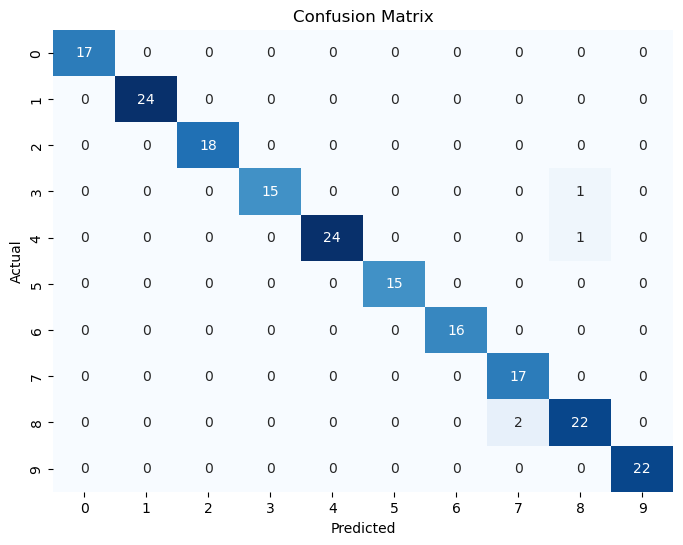

****************************************************************************************************
ML MODEL EVALUATION
****************************************************************************************************
decision_tree_classifier
Accuracy Score: 0.9742268041237113
Precision Score: 0.9765195280499612
Recall Score: 0.9742268041237113
F1 Score: 0.9741781814891339


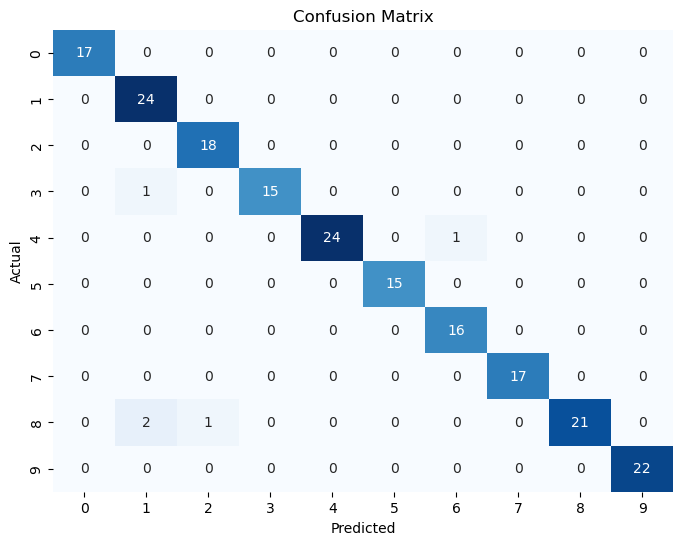

****************************************************************************************************
ML MODEL EVALUATION
****************************************************************************************************
knn_classifier
Accuracy Score: 0.979381443298969
Precision Score: 0.9822253821542838
Recall Score: 0.979381443298969
F1 Score: 0.9795464902880934


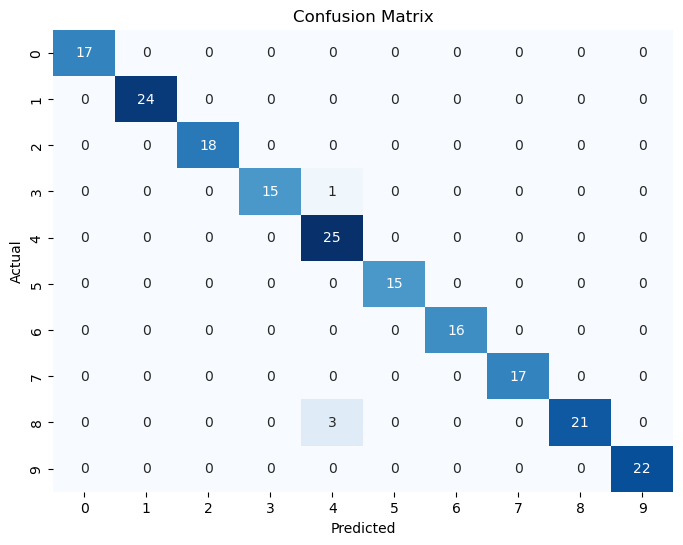

****************************************************************************************************
ML MODEL EVALUATION
****************************************************************************************************
svc
Accuracy Score: 0.979381443298969
Precision Score: 0.9804666304937601
Recall Score: 0.979381443298969
F1 Score: 0.9794248384492729


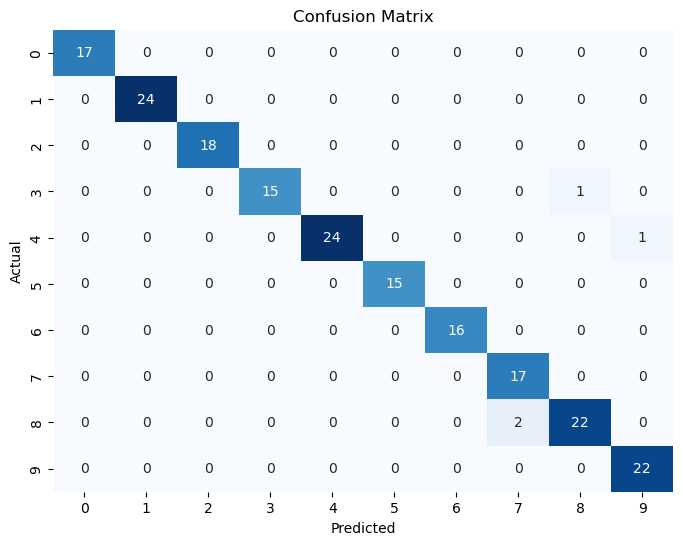

****************************************************************************************************
ML MODEL EVALUATION
****************************************************************************************************
random_forest_classifier
Accuracy Score: 0.979381443298969
Precision Score: 0.9809441128594683
Recall Score: 0.979381443298969
F1 Score: 0.9794302153399044


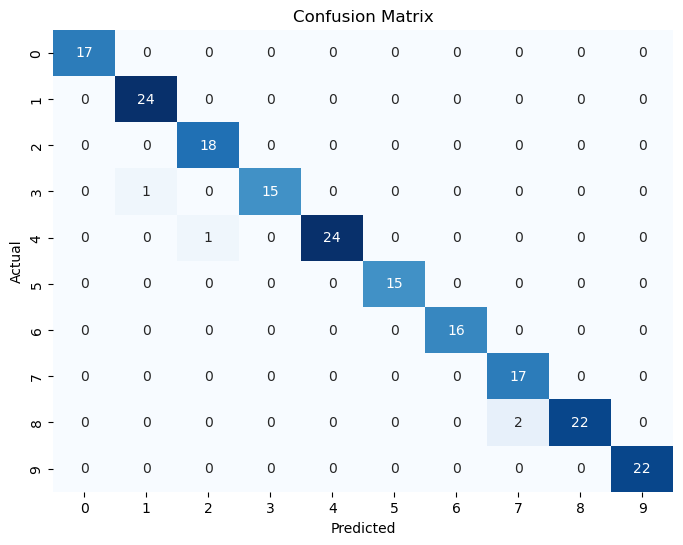

****************************************************************************************************


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay,confusion_matrix,roc_auc_score

for name, model in best_models_classification.items():
    print("ML MODEL EVALUATION")
    print("*"*100)
    print( name)
    y_test_pred = model.predict(X_test)
    print("Accuracy Score:", accuracy_score(y_test, y_test_pred))
    print("Precision Score:", precision_score(y_test, y_test_pred,average="weighted"))
    print("Recall Score:", recall_score(y_test, y_test_pred,average="weighted"))
    print("F1 Score:", f1_score(y_test, y_test_pred,average="weighted"))
    # Assuming y_pred and y_test are defined
    cm = confusion_matrix(y_test, y_test_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print("*"*100)

In [25]:
import pickle
import os

In [26]:
for algorithm, model in best_models_classification.items():
    model_filename = f"best_model{algorithm}.pkl"
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved as {model_filename}")

Model saved as best_modellogistic_regression.pkl
Model saved as best_modelsgd_classifier.pkl
Model saved as best_modeldecision_tree_classifier.pkl
Model saved as best_modelknn_classifier.pkl
Model saved as best_modelsvc.pkl
Model saved as best_modelrandom_forest_classifier.pkl
